In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error


In [2]:
df = pd.read_csv("data/train.csv")
df.head(), df.shape


(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

In [3]:
print(df["SalePrice"].describe())

missing = df.isna().mean().sort_values(ascending=False)
missing.head(15)


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
dtype: float64

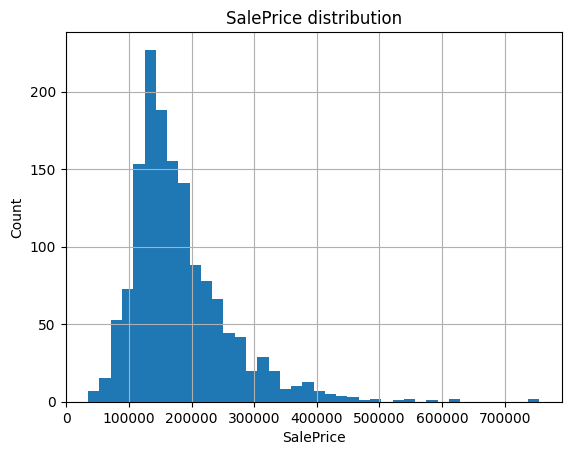

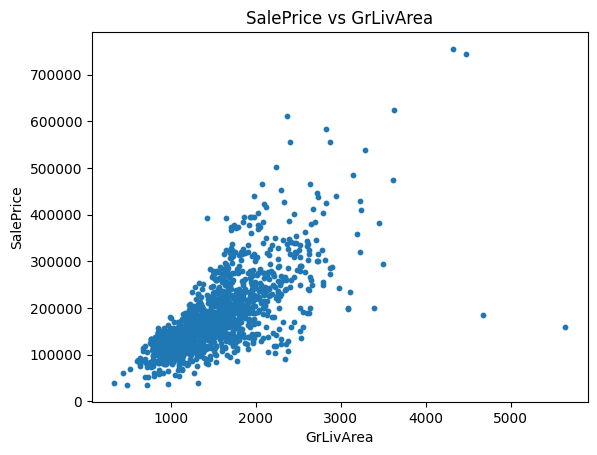

In [4]:
plt.figure()
df["SalePrice"].hist(bins=40)
plt.title("SalePrice distribution")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.scatter(df["GrLivArea"], df["SalePrice"], s=10)
plt.title("SalePrice vs GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()


In [5]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
corr.head(15)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [6]:
target = "SalePrice"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [7]:
model = Ridge(alpha=1.0)

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

clf.fit(X_train, y_train)

pred = clf.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print("R²:", round(r2, 4))
print("MAE:", round(mae, 2))


R²: 0.8437
MAE: 20640.63


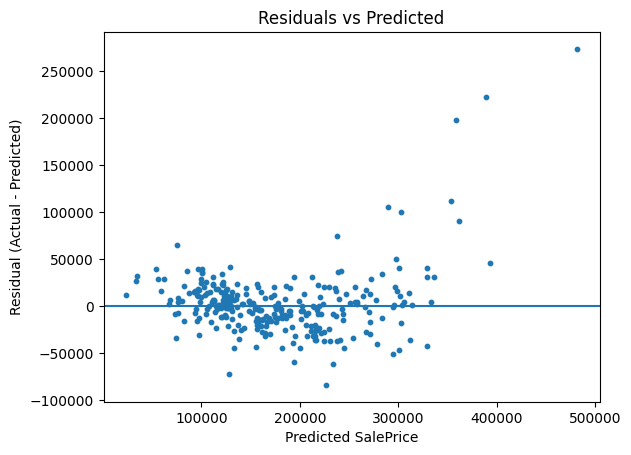

In [8]:
residuals = y_test - pred

plt.figure()
plt.scatter(pred, residuals, s=10)
plt.axhline(0)
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()


In [9]:
print("Top correlations with SalePrice:")
print(corr.head(8))

print("\nInsights:")
print("- GrLivArea and OverallQual are strong drivers of SalePrice.")
print("- Garage and basement-related features also correlate positively.")
print("- The regression baseline provides a solid first predictive model.")


Top correlations with SalePrice:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64

Insights:
- GrLivArea and OverallQual are strong drivers of SalePrice.
- Garage and basement-related features also correlate positively.
- The regression baseline provides a solid first predictive model.
